In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

In [2]:
alpha_width_rate = 20

img_face = cv2.imread('./img/man_face.jpg')
img_skull = cv2.imread('./img/skull.jpg')

img_res = np.zeros_like(img_face)

In [3]:
height, width = img_face.shape[:2]
middle = width // 2
alpha_width = width * alpha_width_rate // 100
start = middle - alpha_width//2
step = 100/alpha_width.

In [6]:
img_res[:, :middle, :] = img_face[:, :middle, :].copy()
img_res[:, middle:, :] = img_skull[:, middle:, :].copy()

In [8]:
# alpha * img1 + (1-alpha) * img2
for i in range(alpha_width + 1):
    alpha = (100 - step * i) / 100   # alpha 0~1로 조정하도록
    beta = 1 - alpha
    img_res[:, start + i] = img_face[:, start+i] * alpha + img_skull[:, start+i] * beta

cv2.imshow('result', img_res)
cv2.waitKey(0)
cv2.destroyAllWindows()

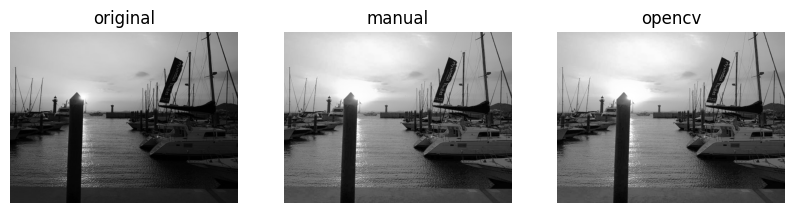

In [10]:
img = cv2.imread('./img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

# manual calc
hist = cv2.calcHist([img], [0], None, [256], [0,255])
cdf = hist.cumsum()    # 누적 히스토그램 만들기
cdf_m = np.ma.masked_equal(cdf,0) #(cdf,0) → 0을 NaN값으로 변환
cdf_m = (cdf_m-cdf_m.min())/(rows*cols) * 255  #Equalization
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img]

# opencv 함수
img3 = cv2.equalizeHist(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,15))
plt.subplot(131), plt.axis('off'), plt.imshow(img), plt.title('original')
plt.subplot(132), plt.axis('off'), plt.imshow(img2), plt.title('manual')
plt.subplot(133), plt.axis('off'), plt.imshow(img3), plt.title('opencv')
plt.show()

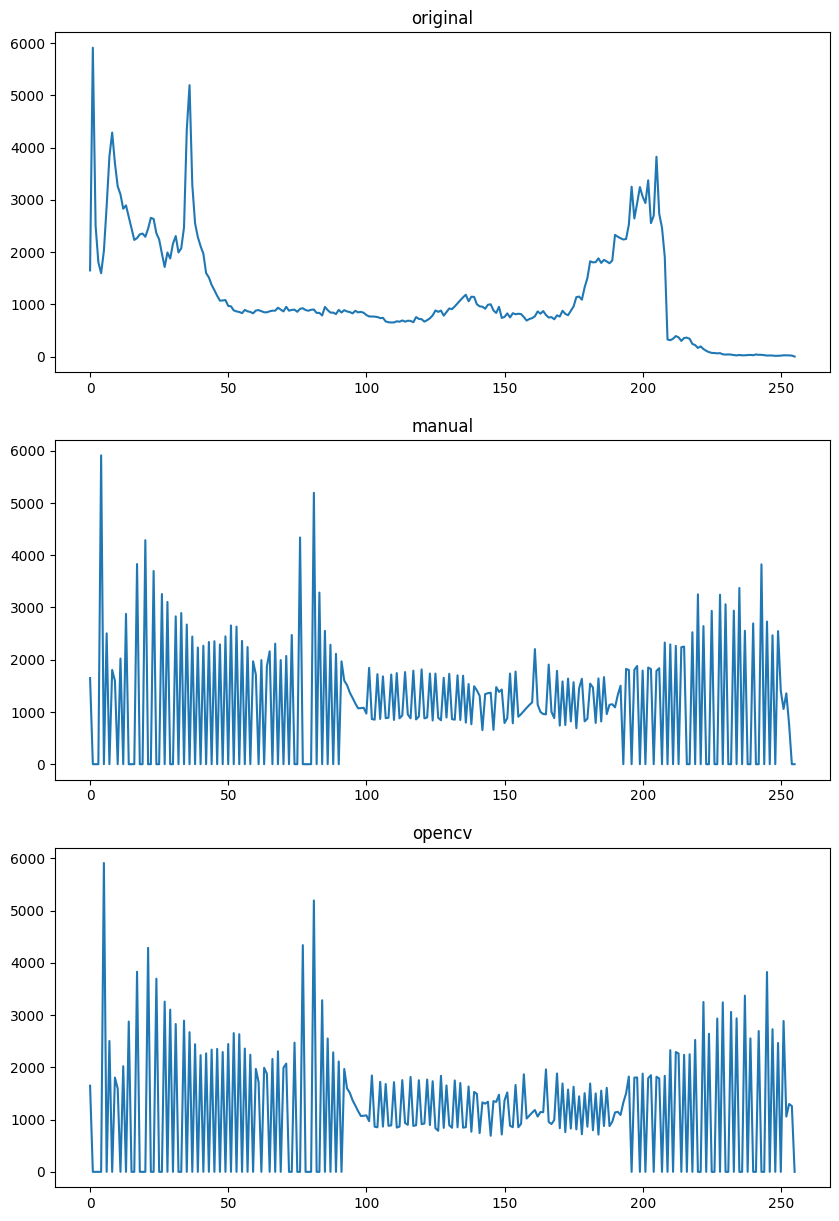

In [13]:
hist = cv2.calcHist([img],[0],None,[256],[0,255])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,255])
hist3 = cv2.calcHist([img3],[0],None,[256],[0,255])
hists = {'original':hist, 'manual':hist2, 'opencv':hist3}
fig = plt.figure(figsize=(10,15))
for i, (key,value) in enumerate(hists.items()):
    plt.subplot(3,1,i+1)
    plt.title(key)
    plt.plot(value)
plt.show()

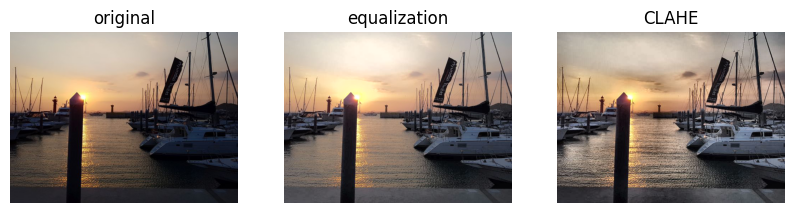

In [14]:
img = cv2.imread('./img/yate.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalization
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

# CLAHE
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0,tileGridSize=(8,8))
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB)
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,15))
plt.subplot(131), plt.axis('off'), plt.imshow(img), plt.title('original')
plt.subplot(132), plt.axis('off'), plt.imshow(img_eq), plt.title('equalization')
plt.subplot(133), plt.axis('off'), plt.imshow(img_clahe), plt.title('CLAHE')
plt.show()

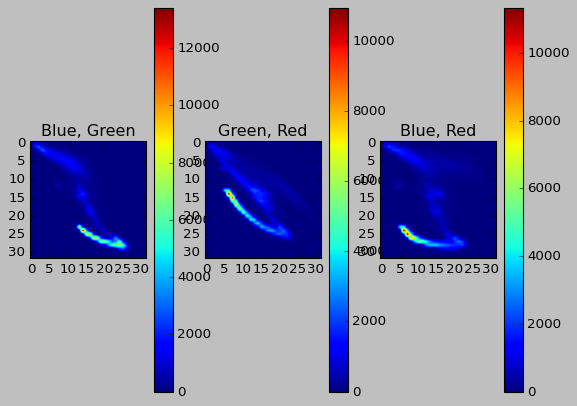

In [19]:
# calcHist(2차원으로) [B,G,R] → calcHist([],[!!!!],....,[x,y],[값의 범위])
img = cv2.imread('./img/mountain.jpg')

plt.style.use('classic')

# Blue, Green
plt.subplot(131)
hist = cv2.calcHist([img], [0,1], None, [32,32], [0,256,0,256])
p = plt.imshow(hist)
plt.title('Blue, Green')
plt.colorbar(p)

# Green, Red
plt.subplot(132)
hist = cv2.calcHist([img], [1,2], None, [32,32], [0,256,0,256])
p = plt.imshow(hist)
plt.title('Green, Red')
plt.colorbar(p)

# Blue, Red
plt.subplot(133)
hist = cv2.calcHist([img], [0,2], None, [32,32], [0,256,0,256])
p = plt.imshow(hist)
plt.title('Blue, Red')
plt.colorbar(p)

plt.show()

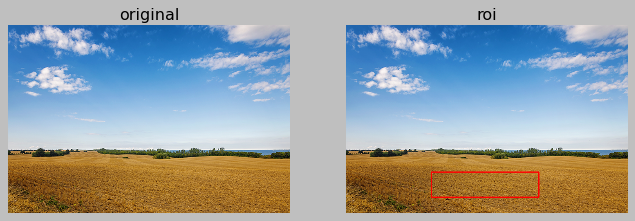

In [24]:
# backprojection
src = cv2.imread('./img/cropland.png')
x, y, w, h = 218, 375, 274, 64
roi = cv2.rectangle(src.copy(), (x,y), (x+w,y+h), (0,0,255),2)

src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,15))
plt.subplot(121), plt.axis('off'), plt.imshow(src), plt.title('original')
plt.subplot(122), plt.axis('off'), plt.imshow(roi), plt.title('roi')
plt.show()

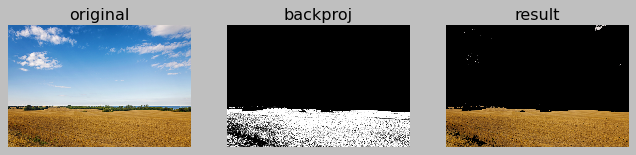

In [29]:
src = cv2.imread('./img/cropland.png')

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
crop = src_ycrcb[y:y+h,x:x+w]
channels = [1,2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0,256]
cb_range = [0,256]
ranges = cr_range + cb_range    # [0,256,0,256]

hist = cv2.calcHist([crop], channels, None, histSize, ranges)
# hist = cv2.calcHist([crop], [1,2], None, [128,128], [0,256,0,256])

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
dst = cv2.copyTo(src, backproj)

src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
backproj = cv2.cvtColor(backproj, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,15))
plt.subplot(131), plt.axis('off'), plt.imshow(src), plt.title('original')
plt.subplot(132), plt.axis('off'), plt.imshow(backproj), plt.title('backproj')
plt.subplot(133), plt.axis('off'), plt.imshow(dst), plt.title('result')
plt.show()

CORREL    	img1:   1.00	img2:   1.00	img3:   1.00	img4:   0.01	
CHISQR    	img1:   0.00	img2:  40.49	img3:   7.94	img4:44417.81	
INTERSECT 	img1:   1.00	img2:   0.56	img3:   0.62	img4:   0.06	
BHATTACHARYYA	img1:   0.00	img2:   0.49	img3:   0.44	img4:   0.96	


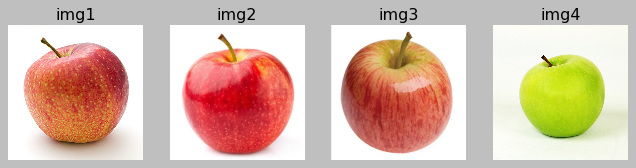

In [31]:
img1 = cv2.imread('./img/apple1.png')
img2 = cv2.imread('./img/apple2.png')
img3 = cv2.imread('./img/apple3.png')
img4 = cv2.imread('./img/apple4.png')

imgs = [img1, img2, img3, img4]

for i in range(4):
    if imgs[i].shape[:2] != (512,512):
        imgs[i] = cv2.resize(imgs[i], (512,512))

hists = []
fig = plt.figure(figsize=(10,5))

for i, img in enumerate(imgs):
    plt.subplot(1,4,i+1)
    plt.title('img%d'%(i+1))  #digit
    plt.axis('off')
    plt.imshow(img[:,:,::-1])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256])
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)

query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}

# apple1과 apple1,2,3,4를 비교
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT:  
            ret = ret/np.sum(query)
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()

In [34]:
img = cv2.imread('./img/smile.jpg')
rows, cols = img.shape[:2]

dx, dy = 100, 50

# 반환행렬
mtrx = np.float32([[1,0,dx],
                   [0,1,dy]])
# 단순 이동
dst = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy))

# 외곽 픽셀 파랑색
dst2 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy),
                      None, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0))

# 반사
dst3 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy),
                      None, cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

cv2.imshow('original', img)
cv2.imshow('move', dst)
cv2.imshow('blue', dst2)
cv2.imshow('reflect', dst3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
img = cv2.imread('./img/smile.jpg')
height, width = img.shape[:2]

m_small = np.float32([[0.5, 0, 0],
                     [0, 0.5, 0]])

m_big = np.float32([[2, 0, 0],
                    [0, 2, 0]])

dst1 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)))
dst2 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)))

cv2.imshow('original', img)
cv2.imshow('small', dst1)
cv2.imshow('big', dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
img = cv2.imread('./img/smile.jpg')
rows, cols = img.shape[:2]

d45 = 45.0*np.pi/180 # 1/4(pi)
d90 = 90.0*np.pi/180

#변환행렬
m45 = np.float32([[np.cos(d45), -1*np.sin(d45), rows//2],
                  [np.sin(d45), np.cos(d45), -1*cols//4]])
# -------------------------------------------------------------
m90 = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)

r45 = cv2.warpAffine(img, m45, (cols, rows))
r90 = cv2.warpAffine(img, m90, (rows, cols))

cv2.imshow('original', img)
cv2.imshow('45', r45)
cv2.imshow('90', r90)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
img = cv2.imread('./img/smile.jpg')
rows, cols = img.shape[:2]

pts1 = np.float32([[100,50],[200,50],[100,200]])
pts2 = np.float32([[80,70],[210,60],[250,120]])

cv2.circle(img, (100,50), 5, (255,0,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

# 변환 행렬
mtrx = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

cv2.imshow('original', img)
cv2.imshow('affine', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
img = cv2.imread('./img/smile.jpg')
rows, cols = img.shape[:2]

pts1 = np.float32([[0,0],[0,rows],[cols,0],[cols,rows]])
pts2 = np.float32([[100,50],[10,rows-50],[cols-100,50],[cols-10,rows-50]])

cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0,rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,0), 10, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

# 반환행렬 
mtrx = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, mtrx, (cols, rows))

cv2.imshow('original', img)
cv2.imshow('perspective', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
img = cv2.imread('./img/taekwonv1.jpg')
img2 = img.copy()
draw = img.copy()

pts1 = np.float32([[188,14],[85,202],[294,216]])
pts2 = np.float32([[128,40],[85,307],[306,167]])

x1,y1,w1,h1 = cv2.boundingRect(pts1)
x2,y2,w2,h2 = cv2.boundingRect(pts2)

roi1 = img[y1:y1+h1, x1:x1+w1]
roi2 = img2[y2:y2+h2, x2:x2+w2]
# 관심영역 기준 좌표 계산
offset1 = np.zeros((3,2), dtype=np.float32)
offset2 = np.zeros((3,2), dtype=np.float32)
for i in range(3):
    offset1[i][0], offset1[i][1] = pts1[i][0]-x1, pts1[i][1]-y1
    offset2[i][0], offset2[i][1] = pts2[i][0]-x2, pts2[i][1]-y2
mtrx = cv2.getAffineTransform(offset1, offset2)
warped = cv2.warpAffine(roi1, mtrx, (w2, h2), None, cv2.INTER_LINEAR,
                        cv2.BORDER_REFLECT_101)
# mask generation
mask = np.zeros((h2, w2), dtype=np.uint8)
cv2.fillConvexPoly(mask, np.int32(offset2), (255))
# mask 합성
warped_masked = cv2.bitwise_and(warped, warped, mask=mask)
roi2_masked = cv2.bitwise_and(roi2, roi2, mask=cv2.bitwise_not(mask))
roi2_masked = roi2_masked + warped_masked
# roi 영역을 다시 배경에 합치기
img2[y2:y2+h2, x2:x2+w2] = roi2_masked

cv2.rectangle(draw, (x1,y1),(x1+w1,y1+h1), (0,255,0), 1)
cv2.polylines(draw, [pts1.astype(np.int32)], True, (255,0,0), 1)
cv2.rectangle(img2, (x2,y2),(x2+w2,y2+h2), (0,0,255), 1)
cv2.imshow('original', draw)
cv2.imshow('warped triangle', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./img/yo.jpg')
img = cv2.resize(img, dsize=(640,480), interpolation=cv2.INTER_AREA)
rows, cols = img.shape[:2]

#뒤집기
import time
st = time.time()
mflip = np.float32([[-1,0,cols-1],
                    [0,-1,rows-1]])
fliped = cv2.warpAffine(img, mflip,(cols,rows))
print('affine',time.time()-st)
st2 = time.time()
mapy, mapx = np.indices((rows, cols), dtype=np.float32)
#print('mapx:', mapx)
mapx2 = cols - mapx - 1 #x축 좌표 뒤집기
mapy2 = rows - mapy - 1 #y축 좌표 뒤집기
#print('mapx:',mapx2)
print('remap',time.time()-st2)
fliped2 = cv2.remap(img, mapx2, mapy2, cv2.INTER_LINEAR)

cv2.imshow('original', img)
cv2.imshow('affine', fliped)
cv2.imshow('remap', fliped2)
cv2.waitKey(0)
cv2.destroyAllWindows()

affine 0.001561880111694336
remap 0.001909494400024414


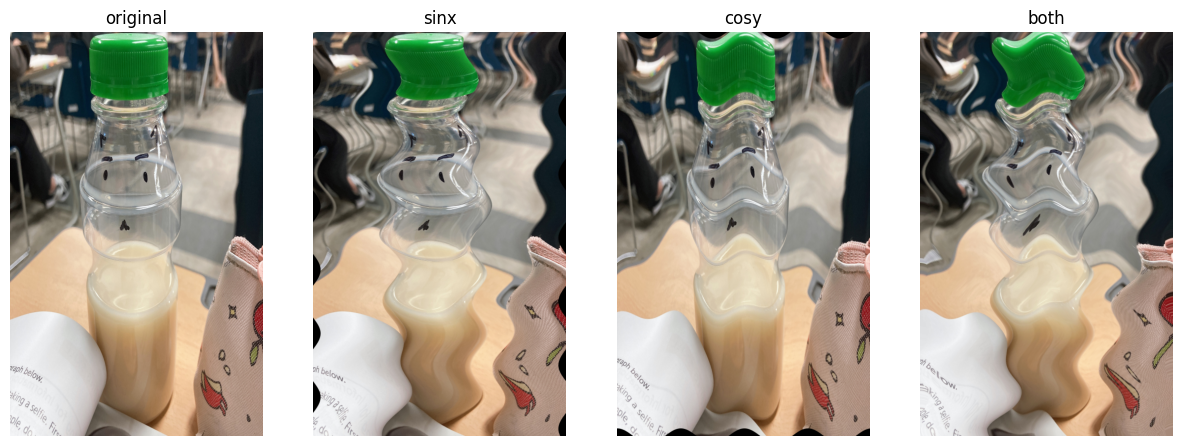

In [3]:
img = cv2.imread('./img/yo.jpg')
img = cv2.resize(img, dsize=(500,800), interpolation=cv2.INTER_AREA)
rows, cols = img.shape[:2]

l = 20    # 파장, 횟수
amp = 15  # 진폭, 높이

#초기 매핑 배열
mapy, mapx = np.indices((rows, cols), dtype=np.float32)

sinx = mapx + amp * np.sin(mapy/l)
cosy = mapy + amp * np.cos(mapx/l)

img_sinx = cv2.remap(img, sinx, mapy, cv2.INTER_LINEAR)   #x축만 sin
img_cosy = cv2.remap(img, mapx, cosy, cv2.INTER_LINEAR)   #y축만 cos

img_both = cv2.remap(img, sinx, cosy, cv2.INTER_LINEAR,   #both
                     None, cv2.BORDER_REPLICATE)

fig=plt.figure(figsize=(15,10))
plt.subplot(141), plt.axis('off'), plt.imshow(img[:,:,::-1]), plt.title('original')
plt.subplot(142), plt.axis('off'), plt.imshow(img_sinx[:,:,::-1]), plt.title('sinx')
plt.subplot(143), plt.axis('off'), plt.imshow(img_cosy[:,:,::-1]), plt.title('cosy')
plt.subplot(144), plt.axis('off'), plt.imshow(img_both[:,:,::-1]), plt.title('both')
plt.show()

In [9]:
img = cv2.imread('./img/baby.jpg')
rows, cols = img.shape[:2]

exp = 1.7  # 0<exp<1: 오목 / exp>1: 볼록
scale = 1  # 반환되는 영역의 크기 (0~1)

mapy, mapx = np.indices((rows,cols), dtype=np.float32)

# 직교 좌표 → 극 좌표
mapx = 2 * mapx / (cols-1) - 1
mapy = 2 * mapy / (rows-1) - 1
r, theta = cv2.cartToPolar(mapx, mapy)

r[r<scale] = r[r<scale] ** exp

# 극 좌표 → 직교 좌표
mapx, mapy = cv2.polarToCart(r, theta)
mapx = ((mapx + 1) * cols - 1) / 2
mapy = ((mapy + 1) * rows - 1) / 2

# remap
distorted = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

cv2.imshow('original', img)
cv2.imshow('distorted', distorted)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
img = cv2.imread('./img/baby.jpg')
rows, cols = img.shape[:2]

mapy, mapx = np.indices((rows, cols), dtype=np.float32)

mapx = 2 * mapx / (cols-1) - 1
mapy = 2 * mapy / (rows-1) - 1
r, theta = cv2.cartToPolar(mapx, mapy)

# k1, k2, k3 = 0.5, 0.2, 0.0  # 배럴 왜곡
k1, k2, k3 = -0.3, 0.0, 0.0  # 핀쿠션 왜곡
# 방사 왜곡 변형 연산
ru = r * (1 + k1*(r**2) + k2*(r**4) + k3*(r**6))

mapx, mapy = cv2.polarToCart(ru, theta)
mapx = ((mapx + 1) * cols - 1) / 2
mapy = ((mapy + 1) * rows - 1) / 2

distorted2 = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

cv2.imshow('original', img)
cv2.imshow('distorted', distorted2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2

img = cv2.imread('./img/taekwonv1.jpg')
win_title = 'mosaic'
rate = 5

while True:
    x,y,w,h = cv2.selectROI(win_title, img, False)
    if w and h:
        roi = img[y:y+h,x:x+w]
        roi = cv2.resize(roi, (w//rate, h//rate))
        roi = cv2.resize(roi, (w,h), interpolation=cv2.INTER_AREA)
        img[y:y+h, x:x+w] = roi
        cv2.imshow(win_title, img)
    else:
        break
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
img = cv2.imread('../Day1/img/woman.jpg')
kernel = np.ones((9,9))/9**2

blured = cv2.filter2D(img, -1, kernel)

cv2.imshow('original', img)
cv2.imshow('blur', blured)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
win_name = 'back_projection'
img = cv2.imread('./img/pump_horse.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) # 마스크의 표면을 부드럽
    cv2.filter2D(bp, -1, disc, bp)   # 마스크 표면 부드럽게
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask = mask)
    cv2.imshow(win_name, result)

def backproject(hist_roi):
    # 역투영 함수
    # Method 1
    # bp = cv2.calcBackProject([hsv_img], [0,1], hist_roi, [0,180,0,256], 1)
    
    # Method 2
    hist_img = cv2.calcHist([hsv_img], [0,1], None, [180,256],[0,180,0,256])
    # 선택 영역과 전체 이미지에 대한 히스토그램 비율 계산
    hist_rate = hist_roi / (hist_img + 1)
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    # bp 1을 넘어서는 안되기 때문에
    bp = np.minimum(bp, 1)
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp,0,255,cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    masking(bp, 'result_manual')

(x, y, w, h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    cv2.rectangle(draw, (x,y), (x+w,y+h), (0,0,255), 2)
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    hist_roi = cv2.calcHist([hsv_roi], [0,1], None, [180,256],[0,180,0,256])
    backproject(hist_roi)
cv2.imshow(win_name, draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 실습 과제

In [17]:
import cv2
import numpy as np

win_name = 'scan'
img = cv2.imread('./img/paper.jpg')
rows, cols = img.shape[:2]
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype = np.float32)

def onMouse(event, x, y, flags, param):
    global pts_cnt
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(draw, (x,y), 10, (0,255,0), -1)
        cv2.imshow(win_name, draw)

        pts[pts_cnt] = [x,y]
        pts_cnt += 1
        if pts_cnt == 4:
            sm = pts.sum(axis=1)
            ##### 여기 틀렸었습니다!!!!
            diff = np.diff(pts, axis=1)

            topLeft = pts[np.argmin(sm)]
            bottomRight = pts[np.argmax(sm)]
            topRight = pts[np.argmin(diff)]
            bottomLeft = pts[np.argmax(diff)]

            pts1 = np.float32([topLeft, topRight, bottomRight, bottomLeft])

            # 변환 후 이미지에 사용할 폭과 높이
            w1 = abs(bottomRight[0] - bottomLeft[0])
            w2 = abs(topRight[0] - topLeft[0])
            h1 = abs(topRight[1] - bottomRight[1])
            h2 = abs(topLeft[1] - bottomLeft[1])

            width = max([w1,w2])
            height = max([h1,h2])

            pts2 = np.float32([[0,0],[width-1,0], [width-1,height-1],[0,height-1]])

            width = int(width)
            height = int(height)

            # 변환 행렬!!!
            # mtrx = cv2.getPerspectiveTransform()
            # 원근 변환 적용
            # result = cv2.warpPerspective()
            cv2.imshow('scanned', result)
##### 여기 추가되었습니다!!!!
cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()